# CAPSTONE PROJECT - Certified Data Analyst

## 1. Connect Colab to Google Drive

## 2. Import Packages

In [1]:
import os
import pandas as pd
import numpy as np
import sqlite3
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import statistics

## 3. Connect SQLite to Python

In [2]:
path = 'C:/Project Narasio Data/'

In [3]:
os.listdir(path)

['Olist E-commerce.db']

## 4. Data Preparation Using SQL

In [4]:
conn = sqlite3.connect(path + 'Olist E-commerce.db')

In [5]:
cur = conn.cursor()

In [6]:
cur.execute("SELECT name FROM sqlite_master WHERE type='table'")
print(cur.fetchall())

[('Orders',), ('Products',), ('Customers',), ('Sellers',), ('Geolocation',), ('table_orders',), ('table_products',), ('table_customers',), ('table_sellers',), ('table_geolocation',)]


In [7]:
orders = pd.read_sql_query('SELECT * FROM Orders', conn)
orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,...,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,432aaf21d85167c2c86ec9448c4e42cc,3df704f53d3f1d4818840b34ec672a9f,delivered,2018-03-01 14:14:28,2018-03-01 15:10:47,2018-03-02 21:09:20,2018-03-12 23:36:26,2018-03-21 00:00:00,1.0,72d3bf1d3a790f8874096fcf860e3eff,...,1.0,credit_card,1.0,54.36,8f39f09c22b1ceb6e3eb178d8e50bb8a,4.0,None,Gostei do produto,2018-03-13 00:00:00,2018-03-14 10:36:16
1,641fb0752bf5b5940c376b3a8bb9dc52,f5afca14dfa9dc64251cf2b45c54c363,delivered,2017-12-15 00:06:10,2017-12-15 00:14:55,2017-12-19 01:58:00,2018-01-03 15:09:32,2018-01-16 00:00:00,1.0,60184212dae4e6b0da32bf54271a8c4a,...,1.0,credit_card,10.0,386.33,ffa0d9ba2678dba5fa370295245f473d,4.0,None,"Inicialmente, pedi o cancelamento do pedido de...",2018-01-04 00:00:00,2018-01-04 18:29:06
2,b52cc4919de82b4d696a4380d10804a3,be8c14c16a4d47194ccdfe10f1fc5b1a,delivered,2018-06-13 13:47:39,2018-06-15 02:37:29,2018-06-15 14:22:00,2018-06-18 22:32:44,2018-06-26 00:00:00,1.0,7564c1759c04fc0a38f2aa84f7a370ee,...,1.0,boleto,1.0,55.02,b1dafcdfcddb6feb75222b9c1f2baad3,5.0,None,None,2018-06-19 00:00:00,2018-06-20 11:07:14
3,82bce245b1c9148f8d19a55b9ff70644,388025bec8128ff20ec1a316ed4dcf02,delivered,2017-04-20 17:15:46,2017-04-21 05:15:56,2017-04-24 09:34:13,2017-05-10 09:17:55,2017-05-12 00:00:00,1.0,a5a0e71a81ae65aa335e71c06261e260,...,1.0,boleto,1.0,267.80,fd793fea4f4a2ddcc956561144b6c04e,1.0,None,None,2017-05-11 00:00:00,2017-05-12 11:25:49
4,82bce245b1c9148f8d19a55b9ff70644,388025bec8128ff20ec1a316ed4dcf02,delivered,2017-04-20 17:15:46,2017-04-21 05:15:56,2017-04-24 09:34:13,2017-05-10 09:17:55,2017-05-12 00:00:00,2.0,a5a0e71a81ae65aa335e71c06261e260,...,1.0,boleto,1.0,267.80,fd793fea4f4a2ddcc956561144b6c04e,1.0,None,None,2017-05-11 00:00:00,2017-05-12 11:25:49


In [8]:
products = pd.read_sql_query('SELECT * FROM Products', conn)
products.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,72d3bf1d3a790f8874096fcf860e3eff,toys,57.0,341.0,2.0,583.0,20.0,21.0,20.0
1,60184212dae4e6b0da32bf54271a8c4a,watches_gifts,59.0,476.0,2.0,394.0,17.0,11.0,14.0
2,7564c1759c04fc0a38f2aa84f7a370ee,construction_tools_construction,59.0,2432.0,3.0,1200.0,16.0,11.0,11.0
3,a5a0e71a81ae65aa335e71c06261e260,housewares,57.0,698.0,3.0,705.0,34.0,22.0,28.0
4,69d980b4120a76616d7b237d731d6156,watches_gifts,60.0,1362.0,3.0,600.0,16.0,11.0,12.0


In [9]:
customers = pd.read_sql_query('SELECT * FROM Customers', conn)
customers.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,3df704f53d3f1d4818840b34ec672a9f,04cf8185c71090d28baa4407b2e6d600,5271,sao paulo,SP
1,f5afca14dfa9dc64251cf2b45c54c363,38cad70d154a4dcc42b598d5c01f7ef1,25211,duque de caxias,RJ
2,be8c14c16a4d47194ccdfe10f1fc5b1a,c86a25b8f5f6c203bb3471553bdc3200,13157,cosmopolis,SP
3,388025bec8128ff20ec1a316ed4dcf02,f9effeed3df9ae063a58c0759b96f8b2,85804,cascavel,PR
4,05e996469a2bf9559c7122b87e156724,5229b8e4d7d2b9b676c2083c17b1ecd0,93180,portao,RS


In [10]:
sellers = pd.read_sql_query('SELECT * FROM Sellers', conn)
sellers.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,8602a61d680a10a82cceeeda0d99ea3d,1001,sao paulo,SP
1,dd55f1bb788714a40e7954c3be6df745,1021,sao paulo,SP
2,e0487761face83d64fcada2408959a36,1021,sao paulo,SP
3,09bad886111255c5b5030314fc7f1a4a,1022,sao paulo,SP
4,f049a72cf58fd31b11f8919cade515e7,1023,sao paulo,SP


In [11]:
geolocation = pd.read_sql_query('SELECT * FROM Geolocation', conn)
geolocation.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng
0,1001,-23.549292,-46.633559
1,1012,-23.540451,-46.643570
2,1014,-23.542521,-46.635335
3,1020,-23.544207,-46.636281
4,1021,-23.546718,-46.639357


## 5. Problem Statement

1. Total Review Score per State based on Total Customer
2. Total Order per Category Product by Customer State
3. Trend Total Payment per Month
4. Total Revenue per category product
5. Average Price per Category Product based on Installment selection
6. Average Range Delivery per Category Product
7. Order Status per Category Product
8. Payment type per Category Product
9. Review Score per Category Product

## 6. Data Preparation Using Python (Cleansing, Manipulation, Handling Outlier dst)

## 1. Table Orders

## Check and Changing Data Types

In [12]:
def convert_to_dt(orders, columns):
    for col in columns:
        orders[col] = pd.to_datetime(orders[col], format='%Y-%m-%d %H:%M:%S', errors='coerce')

convert_to_dt(orders, ['order_purchase_timestamp', 'order_approved_at', 'order_delivered_carrier_date',
                       'order_delivered_customer_date', 'order_estimated_delivery_date',
                       'shipping_limit_date', 'review_creation_date', 'review_answer_timestamp'])

Convert data pada kolom yang bertipe tanggal ke Datetime

In [13]:
orders['review_score'] = orders['review_score'].astype(str)

Mengubah tipe data pada kolom review_score, karena review score seharusnya string meskipun nilainya dalam bentuk angka

In [14]:
orders.dtypes

order_id                                 object
customer_id                              object
order_status                             object
order_purchase_timestamp         datetime64[ns]
order_approved_at                datetime64[ns]
order_delivered_carrier_date     datetime64[ns]
order_delivered_customer_date    datetime64[ns]
order_estimated_delivery_date    datetime64[ns]
order_item_id                           float64
product_id                               object
seller_id                                object
shipping_limit_date              datetime64[ns]
price                                   float64
freight_value                           float64
payment_sequential                      float64
payment_type                             object
payment_installments                    float64
payment_value                           float64
review_id                                object
review_score                             object
review_comment_title                    

## Check Missing Value

In [15]:
pd.isnull(orders).sum()

order_id                            1
customer_id                         0
order_status                        0
order_purchase_timestamp            1
order_approved_at                  18
order_delivered_carrier_date      199
order_delivered_customer_date     316
order_estimated_delivery_date       1
order_item_id                      81
product_id                         81
seller_id                          81
shipping_limit_date                81
price                              81
freight_value                      81
payment_sequential                  3
payment_type                        3
payment_installments                3
payment_value                       3
review_id                           1
review_score                        0
review_comment_title             9703
review_comment_message           6266
review_creation_date                2
review_answer_timestamp             2
dtype: int64

### Drop Columns

In [16]:
def drop_columns(orders, columns):
    orders = orders.drop(columns=columns)
    return orders

columns_to_drop = ['review_comment_title', 'review_comment_message']
orders = drop_columns(orders, columns_to_drop)

Menghapus kolom review_comment_title dan review_comment_massage karena terlalu banyak nilai yang missing, apabila digunakan metode mode, maka hasil analisa dari kolom tersebut akan menjadi bias

In [17]:
orders.dropna(subset=['order_id'], inplace=True)

Menghapus baris yang memiliki missing value pada kolom order_id, karena kolom order_id seharusnya unik dan tidak boleh ada yang duplikat

In [18]:
def input_backfill(orders, columns):
    for col in columns:
        orders[col] = orders[col].fillna(method='backfill')

input_backfill(orders, ['order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date',
                        'shipping_limit_date', 'review_creation_date', 'review_answer_timestamp'])

Dikarenakan ketika menggunakan mode untuk mengatasi kolom bertipe tanggal akan membuat datanya menjadi tidak konsisten, maka disini saya memutuskan untuk menggunakan metode backfill

In [19]:
orders['order_item_id'].fillna(int(orders['order_item_id'].median()), inplace=True)

Handle missing value pada kolom order_item_id menggunakan median bukan mean, karena kolom order_item_id merupakan jumlah total barang yang dipesan dalam satu order dan itu tidak boleh berupa angka koma nantinya

In [20]:
orders['product_id'] = orders['product_id'].fillna(orders['product_id'].mode()[0])

Handle missing value pada kolom product_id menggunakan mode, mengapa menggunakan mode? karena apabila kita memutuskan untuk drop baris yang missing pada kolom tersebut, maka unique value pada kolom order_status akan banyak nilang yang hilang

In [21]:
orders['seller_id'] = orders['seller_id'].fillna(orders['seller_id'].mode()[0])

Keputusannya sama seperti ketika meng handle missing value pada kolom product_id

In [22]:
orders['price'].fillna(int(orders['price'].mean()), inplace=True)

Handle missing value pada kolom price mengapa menggunakan mean? karena value pada kolom price itu berupa float, maka dari itu lebih baik menggunakan mean, karena mean sering digunakan untuk handle missing value pada kolom yang bertipe integer

In [23]:
orders['freight_value'].fillna(int(orders['freight_value'].mean()), inplace=True)

Metode ini digunakan sama dengan alasan yang sama seperti pada kolom price

In [24]:
orders['payment_sequential'].fillna(int(orders['payment_sequential'].median()), inplace=True)

Handle missing value pada kolom payment_sequential menggunakan median bukan mean, karena kolom payment_sequential memiliki nilai unique yang tidak memiliki koma dan apabila menggunakan mean, akan ditakutkan hasilnya berupa angka koma nantinya

In [25]:
orders['payment_type'] = orders['payment_type'].fillna(orders['payment_type'].mode()[0])

Payment type merupakan tipe pembayaran seperti credit card, debit card, dll. Maka dari itu lebih baik menggunakan metode mode untuk handle missing value pada kolom ini, dan kolom ini juga tidak memiliki nilai missing yang terlalu banyak

In [26]:
orders['payment_installments'].fillna(int(orders['payment_installments'].median()), inplace=True)

Handle missing value pada kolom payment_installments menggunakan median bukan mean, karena kolom payment_installments merupakan ketagori pemilihan tipe angsuran seperti 1, 2, 3 dst yang tidak memiliki koma dan apabila menggunakan mean, akan ditakutkan hasilnya berupa angka koma nantinya

In [27]:
orders['payment_value'].fillna(int(orders['payment_value'].mean()), inplace=True)

Handle missing value pada kolom payment_value mengapa menggunakan mean? karena value pada kolom payment_value itu berupa float, maka dari itu lebih baik menggunakan mean, karena mean sering digunakan untuk handle missing value pada kolom yang bertipe integer

In [28]:
pd.isnull(orders).sum()

order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     0
order_delivered_customer_date    0
order_estimated_delivery_date    0
order_item_id                    0
product_id                       0
seller_id                        0
shipping_limit_date              0
price                            0
freight_value                    0
payment_sequential               0
payment_type                     0
payment_installments             0
payment_value                    0
review_id                        0
review_score                     0
review_creation_date             0
review_answer_timestamp          0
dtype: int64

In [29]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11000 entries, 0 to 11000
Data columns (total 22 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       11000 non-null  object        
 1   customer_id                    11000 non-null  object        
 2   order_status                   11000 non-null  object        
 3   order_purchase_timestamp       11000 non-null  datetime64[ns]
 4   order_approved_at              11000 non-null  datetime64[ns]
 5   order_delivered_carrier_date   11000 non-null  datetime64[ns]
 6   order_delivered_customer_date  11000 non-null  datetime64[ns]
 7   order_estimated_delivery_date  11000 non-null  datetime64[ns]
 8   order_item_id                  11000 non-null  float64       
 9   product_id                     11000 non-null  object        
 10  seller_id                      11000 non-null  object        
 11  shipping_limit_

## Deteksi Outlier

In [30]:
orders['price'].describe()

count    11000.000000
mean       119.323238
std        175.303091
min          1.200000
25%         39.900000
50%         75.000000
75%        129.975000
max       4399.870000
Name: price, dtype: float64

Text(0.5, 0, 'Table Orders')

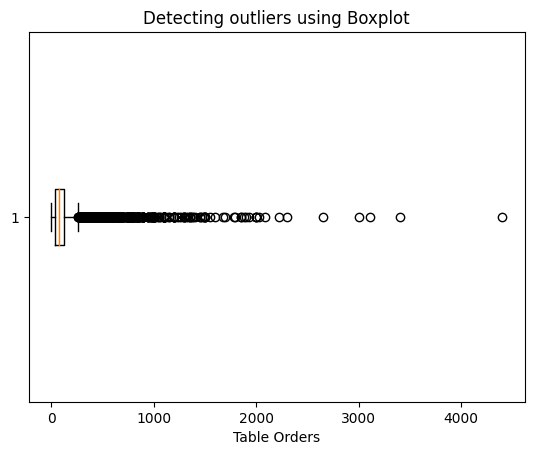

In [31]:
plt.boxplot(orders['price'], vert=False)
plt.title("Detecting outliers using Boxplot")
plt.xlabel('Table Orders')

In [32]:
def detect_outliers_price(data):
    outliers_price = []
    data = sorted(data)
    q1_price = np.percentile(data, 25)
    q3_price = np.percentile(data, 75)
    IQR_price = q3_price - q1_price
    lower_price = q1_price - (1.5 * IQR_price)
    upper_price = q3_price + (1.5 * IQR_price)

    print('Q1 value in price column is:', q1_price)
    print('Q3 value in price column is:', q3_price)
    print('IQR value in price column is:', IQR_price)
    print('Lower value in price column is:', lower_price)
    print('Upper value in price column is:', upper_price)

    for i in data: 
        if (i<lower_price or i>upper_price):
            outliers_price.append(i)
    return outliers_price
outliers_price = detect_outliers_price(orders['price'])
print("Outliers from IQR method: ", outliers_price)

Q1 value in price column is: 39.9
Q3 value in price column is: 129.975
IQR value in price column is: 90.07499999999999
Lower value in price column is: -95.21249999999998
Upper value in price column is: 265.0875
Outliers from IQR method:  [267.0, 267.0, 268.38, 268.99, 269.0, 269.0, 269.0, 269.0, 269.0, 269.0, 269.0, 269.0, 269.0, 269.0, 269.45, 269.9, 269.9, 269.9, 269.9, 269.9, 269.9, 269.9, 269.9, 269.9, 269.9, 269.9, 269.9, 269.99, 269.99, 269.99, 269.99, 269.99, 269.99, 270.0, 270.0, 270.0, 270.0, 270.0, 270.0, 270.9, 271.0, 271.0, 271.92, 274.0, 274.0, 274.0, 274.9, 275.0, 276.14, 276.99, 277.0, 277.0, 277.0, 277.8, 278.0, 279.0, 279.0, 279.0, 279.0, 279.0, 279.64, 279.64, 279.9, 279.9, 279.9, 279.9, 279.9, 279.9, 279.9, 279.9, 279.9, 279.9, 279.99, 279.99, 279.99, 279.99, 279.99, 279.99, 279.99, 279.99, 280.0, 280.0, 280.0, 281.9, 283.0, 284.9, 284.9, 284.99, 284.99, 285.0, 285.0, 285.0, 285.15, 287.0, 287.0, 287.7, 288.0, 288.92, 289.0, 289.0, 289.0, 289.0, 289.0, 289.0, 289.0, 

### Replace with upper and lower limit values

In [33]:
tenth_percentile_price = np.percentile(orders['price'], 10)
ninetieth_percentile_price = np.percentile(orders['price'], 90)
print(tenth_percentile_price, ninetieth_percentile_price)
handle_outlier_price = []
for x in orders['price']:
    if x<tenth_percentile_price:
        x=tenth_percentile_price
    elif x>ninetieth_percentile_price:
        x=ninetieth_percentile_price
    else:
        x=x
    handle_outlier_price.append(x)
orders['price'] = handle_outlier_price
print("New sample:", handle_outlier_price)

22.99 229.00400000000002
New sample: [38.25, 229.00400000000002, 42.99, 38.0, 38.0, 219.0, 93.0, 22.99, 35.0, 42.9, 25.0, 59.99, 159.99, 117.3, 229.00400000000002, 99.9, 109.9, 159.0, 27.9, 229.00400000000002, 229.00400000000002, 109.9, 70.91, 219.0, 89.9, 39.99, 139.99, 22.99, 129.9, 55.0, 22.99, 175.0, 59.9, 229.00400000000002, 61.5, 29.0, 49.0, 108.9, 85.0, 54.99, 229.00400000000002, 29.99, 59.0, 22.99, 35.9, 56.97, 196.8, 196.8, 89.9, 69.99, 69.99, 229.00400000000002, 229.00400000000002, 124.9, 89.9, 45.0, 229.00400000000002, 189.9, 33.5, 29.95, 72.5, 38.0, 94.98, 77.0, 51.0, 119.99, 229.00400000000002, 169.9, 25.89, 110.99, 40.8, 22.99, 99.0, 229.00400000000002, 89.99, 229.00400000000002, 199.0, 37.99, 169.99, 104.71, 22.99, 229.00400000000002, 90.9, 119.9, 112.01, 45.95, 69.9, 29.9, 186.0, 103.99, 22.99, 199.0, 75.9, 44.9, 64.9, 30.0, 59.9, 229.00400000000002, 114.0, 67.9, 142.99, 23.99, 98.0, 229.00400000000002, 22.99, 34.9, 110.0, 39.9, 36.99, 39.0, 119.99, 199.99, 112.99, 84.9

Handle outlier pada kolom price mengapa menggunakan metode upper and limit values? karena sebelumnya saya sudah drop, lalu ganti menggunakan median, akan tetapi nilai outliernya tetap tidak hilang, maka dari itu saya menggunakan metode ini dan akhirnya tuntas

Text(0.5, 0, 'Table Orders')

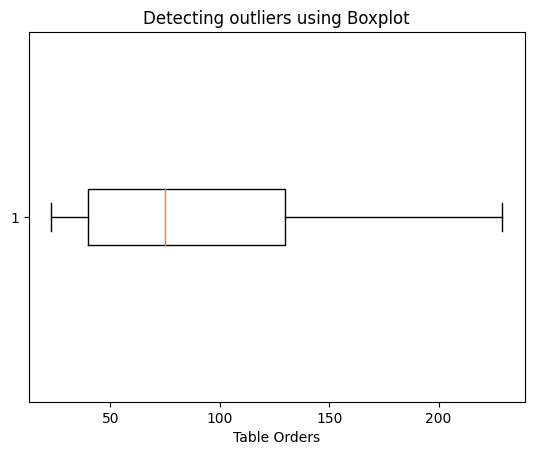

In [34]:
plt.boxplot(orders['price'], vert=False)
plt.title("Detecting outliers using Boxplot")
plt.xlabel('Table Orders')

In [35]:
orders['price'].describe()

count    11000.000000
mean        94.570665
std         65.869142
min         22.990000
25%         39.900000
50%         75.000000
75%        129.975000
max        229.004000
Name: price, dtype: float64

### payment_value

In [36]:
orders['payment_value'].describe()

count    11000.000000
mean       170.936601
std        272.015799
min          0.030000
25%         60.230000
50%        108.200000
75%        188.932500
max      13664.080000
Name: payment_value, dtype: float64

Text(0.5, 0, 'Table Orders')

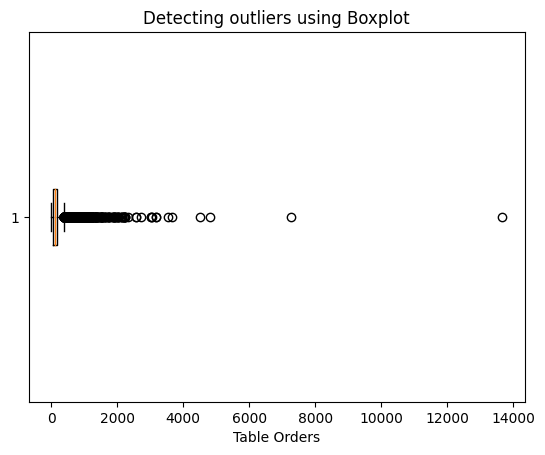

In [37]:
plt.boxplot(orders['payment_value'], vert=False)
plt.title("Detecting outliers using Boxplot")
plt.xlabel('Table Orders')

In [38]:
def detect_outliers_payment_value(data):
    outliers_payment_value = []
    data = sorted(data)
    q1_payment_value = np.percentile(data, 25)
    q3_payment_value = np.percentile(data, 75)
    IQR_payment_value = q3_payment_value - q1_payment_value
    lower_payment_value = q1_payment_value - (1.5 * IQR_payment_value)
    upper_payment_value = q3_payment_value + (1.5 * IQR_payment_value)

    print('Q1 value in payment_value column is:', q1_payment_value)
    print('Q3 value in payment_value column is:', q3_payment_value)
    print('IQR value in payment_value column is:', IQR_payment_value)
    print('Lower value in payment_value column is:', lower_payment_value)
    print('Upper value in payment_value column is:', upper_payment_value)

    for i in data: 
        if (i<lower_payment_value or i>upper_payment_value):
            outliers_payment_value.append(i)
    return outliers_payment_value
outliers_payment_value = detect_outliers_payment_value(orders['payment_value'])
print("Outliers from IQR method: ", outliers_payment_value)

Q1 value in payment_value column is: 60.23
Q3 value in payment_value column is: 188.9325
IQR value in payment_value column is: 128.70250000000001
Lower value in payment_value column is: -132.82375000000005
Upper value in payment_value column is: 381.98625000000004
Outliers from IQR method:  [382.0, 382.14, 382.28, 382.79, 382.92, 382.92, 382.92, 383.3, 383.98, 383.99, 384.04, 384.27, 384.5, 384.66, 384.86, 385.52, 385.57, 385.61, 385.63, 385.67, 385.68, 385.68, 385.74, 386.24, 386.33, 386.6, 387.27, 387.27, 387.37, 387.41, 387.5, 387.57, 387.85, 387.85, 388.17, 389.16, 389.7, 389.82, 390.32, 391.45, 391.45, 391.66, 391.66, 391.87, 392.02, 392.56, 392.72, 392.89, 393.07, 393.08, 393.09, 393.47, 394.38, 394.42, 394.54, 394.64, 396.1, 397.02, 397.04, 397.46, 398.06, 398.06, 398.42, 398.62, 399.16, 399.95, 400.0, 400.36, 400.44, 400.44, 400.65, 402.49, 402.56, 403.24, 403.27, 403.8, 403.8, 404.06, 404.28, 404.28, 404.88, 405.03, 405.03, 405.36, 405.47, 405.54, 405.54, 405.65, 405.69, 406.7

### Replace with upper and lower limit values

In [39]:
tenth_percentile_payment_value = np.percentile(orders['payment_value'], 10)
ninetieth_percentile_payment_value = np.percentile(orders['payment_value'], 90)
print(tenth_percentile_payment_value, ninetieth_percentile_payment_value)
handle_outlier_payment_value = []
for x in orders['payment_value']:
    if x<tenth_percentile_payment_value:
        x=tenth_percentile_payment_value
    elif x>ninetieth_percentile_payment_value:
        x=ninetieth_percentile_payment_value
    else:
        x=x
    handle_outlier_payment_value.append(x)
orders['payment_value'] = handle_outlier_payment_value
print("New sample:", handle_outlier_payment_value)

36.75 333.51
New sample: [54.36, 333.51, 55.02, 267.8, 267.8, 36.75, 201.82, 36.75, 50.35, 58.0, 38.47, 161.3, 217.78, 145.5, 333.51, 109.35, 133.25, 180.95, 36.75, 286.54, 301.19, 241.74, 84.43, 118.56, 204.06, 77.03, 159.07, 36.75, 139.56, 72.64, 36.75, 333.51, 73.34, 306.16, 87.21, 44.1, 64.79, 120.68, 92.85, 73.25, 333.51, 44.09, 95.24, 218.0, 58.95, 76.34, 109.2, 100.0, 110.98, 36.75, 68.99, 324.32, 333.51, 163.32, 107.78, 333.51, 333.51, 243.36, 48.6, 158.97, 163.52, 55.63, 116.13, 262.86, 70.6, 136.04, 333.51, 195.17, 48.79, 125.16, 49.09, 36.75, 108.51, 319.99, 105.37, 333.51, 225.42, 51.07, 333.51, 246.64, 36.75, 333.51, 157.91, 129.49, 127.89, 61.05, 87.13, 37.68, 201.47, 328.82, 36.75, 217.1, 83.69, 60.0, 80.65, 40.96, 77.57, 304.14, 133.15, 86.48, 161.08, 38.09, 110.08, 333.51, 68.0, 47.13, 146.85, 60.33, 56.96, 47.88, 158.38, 219.19, 136.32, 104.46, 37.38, 55.69, 218.08, 218.08, 36.75, 96.43, 169.49, 263.61, 264.24, 175.86, 333.51, 67.83, 54.38, 97.32, 138.94, 70.12, 36.75

Handle outlier pada kolom payment_value mengapa menggunakan metode upper and limit values? karena sebelumnya saya sudah drop, lalu ganti menggunakan median, akan tetapi nilai outliernya tetap tidak hilang, maka dari itu saya menggunakan metode ini dan akhirnya tuntas

Text(0.5, 0, 'Table Orders')

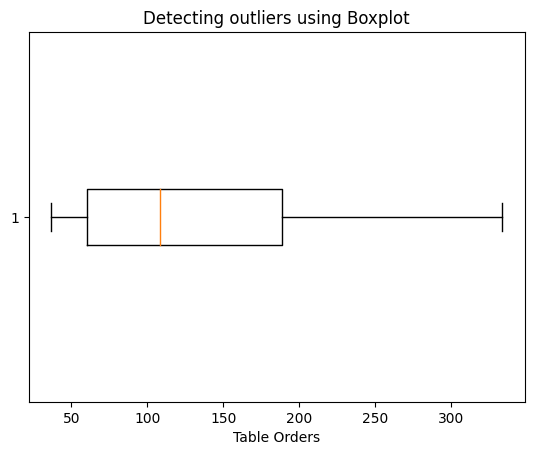

In [40]:
plt.boxplot(orders['payment_value'], vert=False)
plt.title("Detecting outliers using Boxplot")
plt.xlabel('Table Orders')

In [41]:
orders['payment_value'].describe()

count    11000.000000
mean       137.622758
std         94.722643
min         36.750000
25%         60.230000
50%        108.200000
75%        188.932500
max        333.510000
Name: payment_value, dtype: float64

## Inconsistent Data

In [42]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11000 entries, 0 to 11000
Data columns (total 22 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       11000 non-null  object        
 1   customer_id                    11000 non-null  object        
 2   order_status                   11000 non-null  object        
 3   order_purchase_timestamp       11000 non-null  datetime64[ns]
 4   order_approved_at              11000 non-null  datetime64[ns]
 5   order_delivered_carrier_date   11000 non-null  datetime64[ns]
 6   order_delivered_customer_date  11000 non-null  datetime64[ns]
 7   order_estimated_delivery_date  11000 non-null  datetime64[ns]
 8   order_item_id                  11000 non-null  float64       
 9   product_id                     11000 non-null  object        
 10  seller_id                      11000 non-null  object        
 11  shipping_limit_

In [43]:
orders['price'] = orders['price'].replace({229.00400000000002:229})

Nahh ini merupakan sample hasil dari handling outlier diatas, dan ini hasilnya menjadi tidak konsisten, dan akhirnya saya memutuskan untuk me replace angka dibelakang koma, dan setelah saya cek kembali hasil outliernya, outlier tidak muncul

## Check Duplicated

1. order_id

In [44]:
orders[orders.duplicated(subset=['order_id'], keep=False)]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,...,price,freight_value,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_creation_date,review_answer_timestamp
3,82bce245b1c9148f8d19a55b9ff70644,388025bec8128ff20ec1a316ed4dcf02,delivered,2017-04-20 17:15:46,2017-04-21 05:15:56,2017-04-24 09:34:13,2017-05-10 09:17:55,2017-05-12,1.0,a5a0e71a81ae65aa335e71c06261e260,...,38.00,15.56,1.0,boleto,1.0,267.80,fd793fea4f4a2ddcc956561144b6c04e,1.0,2017-05-11,2017-05-12 11:25:49
4,82bce245b1c9148f8d19a55b9ff70644,388025bec8128ff20ec1a316ed4dcf02,delivered,2017-04-20 17:15:46,2017-04-21 05:15:56,2017-04-24 09:34:13,2017-05-10 09:17:55,2017-05-12,2.0,a5a0e71a81ae65aa335e71c06261e260,...,38.00,15.56,1.0,boleto,1.0,267.80,fd793fea4f4a2ddcc956561144b6c04e,1.0,2017-05-11,2017-05-12 11:25:49
46,4df92d82d79c3b52c7138679fa9b07fc,ba0660bf3fffe505ee892e153a2fbd49,delivered,2018-07-24 11:32:11,2018-07-29 23:30:52,2018-07-26 14:46:00,2018-07-27 18:55:57,2018-08-06,1.0,de533fe5b9448ea9792195806938dbf5,...,196.80,12.40,1.0,credit_card,5.0,109.20,b45c75845de7e21f4823abad933fb58d,5.0,2018-08-08,2018-08-08 14:34:42
47,4df92d82d79c3b52c7138679fa9b07fc,ba0660bf3fffe505ee892e153a2fbd49,delivered,2018-07-24 11:32:11,2018-07-29 23:30:52,2018-07-26 14:46:00,2018-07-27 18:55:57,2018-08-06,1.0,de533fe5b9448ea9792195806938dbf5,...,196.80,12.40,2.0,voucher,1.0,100.00,b45c75845de7e21f4823abad933fb58d,5.0,2018-08-08,2018-08-08 14:34:42
49,9472d3c8a0ad463cbfc89897334431da,7e016f9ea275279784f42e0642214284,delivered,2017-11-20 16:21:04,2017-11-21 09:50:30,2017-11-22 19:48:47,2017-12-21 14:22:54,2017-12-12,1.0,9036be77e0a74cca6eeef0740649b97b,...,69.99,19.03,1.0,credit_card,2.0,36.75,7e3b4393a443a81b64ff829f2636542a,1.0,2017-12-14,2017-12-15 13:00:18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10874,1ce0acf125f1bcd636276dd213363196,d11524bb77c28efad04e4467eac8a660,delivered,2017-07-31 18:10:29,2017-07-31 18:25:20,2017-08-02 18:22:30,2017-08-09 20:38:07,2017-08-28,1.0,cc9e875c2df286dbed83efe01191162c,...,129.00,26.18,2.0,voucher,1.0,100.00,4dc7a70acb9d9eeeb1db4e74f88b2e9b,5.0,2017-08-10,2017-08-13 17:29:51
10885,de06e436fbb3dd6e10bafb5f24ed5530,11ff39f6282e2a89f5c079a47af66743,delivered,2017-09-07 01:15:30,2017-09-07 02:00:15,2017-09-08 20:29:50,2017-09-12 21:44:35,2017-09-26,1.0,418d8bb517562fb8e8a2f1c5de0afa70,...,22.99,16.11,3.0,voucher,1.0,36.75,1d41c685c7ba8c6a348bdafdf4cc76ac,5.0,2017-09-13,2017-09-14 13:18:04
10886,de06e436fbb3dd6e10bafb5f24ed5530,11ff39f6282e2a89f5c079a47af66743,delivered,2017-09-07 01:15:30,2017-09-07 02:00:15,2017-09-08 20:29:50,2017-09-12 21:44:35,2017-09-26,1.0,418d8bb517562fb8e8a2f1c5de0afa70,...,22.99,16.11,4.0,voucher,1.0,36.75,1d41c685c7ba8c6a348bdafdf4cc76ac,5.0,2017-09-13,2017-09-14 13:18:04
10940,9aec4e1ae90b23c7bf2d2b3bfafbd943,e7d6802668de6e74d0d6c56565bf2a24,delivered,2017-10-02 15:49:23,2017-10-02 16:05:19,2017-10-09 21:33:34,2017-10-11 17:11:54,2017-10-24,3.0,47920da896bbd89e851429c78a7a7a8b,...,179.99,0.08,1.0,credit_card,10.0,333.51,6cc6312c741405ce7052899d16ddf6ad,1.0,2017-10-12,2017-10-12 22:19:11


Mengapa saya deteksi duplikat menggunakan acuan pada kolom order_id? karena pada table ini merupakan khusus mengenai data tentang order, dan order_id tidak boleh ada yang duplikat dan harus memiliki nilai yang unik

In [45]:
orders = orders.drop_duplicates(subset=['order_id'])

In [46]:
orders[orders.duplicated(subset=['order_id'], keep=False)]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,...,price,freight_value,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_creation_date,review_answer_timestamp


In [47]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10722 entries, 0 to 11000
Data columns (total 22 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       10722 non-null  object        
 1   customer_id                    10722 non-null  object        
 2   order_status                   10722 non-null  object        
 3   order_purchase_timestamp       10722 non-null  datetime64[ns]
 4   order_approved_at              10722 non-null  datetime64[ns]
 5   order_delivered_carrier_date   10722 non-null  datetime64[ns]
 6   order_delivered_customer_date  10722 non-null  datetime64[ns]
 7   order_estimated_delivery_date  10722 non-null  datetime64[ns]
 8   order_item_id                  10722 non-null  float64       
 9   product_id                     10722 non-null  object        
 10  seller_id                      10722 non-null  object        
 11  shipping_limit_

## Renaming Columns

In [48]:
orders = orders.rename(columns={'order_purchase_timestamp': 'purchase', 'order_approved_at': 'approved',
                                'order_delivered_carrier_date': 'delivered_carrier',
                                'order_delivered_customer_date': 'delivered_customer',
                                'order_estimated_delivery_date': 'estimated_delivery',
                                'order_item_id': 'item_id', 'shipping_limit_date': 'shipping_limit',
                                'review_creation_date': 'review_creation',
                                'review_answer_timestamp': 'review_answer'})

Rename beberapa kolom dengan maksud agar nama kolom-kolom menjadi lebih efisien dan singkat untuk mempermudah dalam step analisis nantinya

In [49]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10722 entries, 0 to 11000
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   order_id              10722 non-null  object        
 1   customer_id           10722 non-null  object        
 2   order_status          10722 non-null  object        
 3   purchase              10722 non-null  datetime64[ns]
 4   approved              10722 non-null  datetime64[ns]
 5   delivered_carrier     10722 non-null  datetime64[ns]
 6   delivered_customer    10722 non-null  datetime64[ns]
 7   estimated_delivery    10722 non-null  datetime64[ns]
 8   item_id               10722 non-null  float64       
 9   product_id            10722 non-null  object        
 10  seller_id             10722 non-null  object        
 11  shipping_limit        10722 non-null  datetime64[ns]
 12  price                 10722 non-null  float64       
 13  freight_value   

## Save Data Cleansing Results using Python to SQLite

In [50]:
orders.to_sql(name='table_orders', con=conn, if_exists='replace', index=False)

10722

Mengapa saya save hasil cleansing menggunakan Python ke SQLite? karena ketika melakukan EDA, saya ingin menganalisisnya menggunakan SQLite

In [51]:
pd.read_sql_query("""
                    SELECT *
                    FROM table_orders
                    WHERE order_id IS NULL
                """, conn)

,order_id,customer_id,order_status,purchase,approved,delivered_carrier,delivered_customer,estimated_delivery,item_id,product_id,...,price,freight_value,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_creation,review_answer


## Save Data Cleansing Results using Python to CSV

In [52]:
orders.to_csv('orders.csv', index=False)

Tujuan save hasil cleansing ke CSV yaitu untuk membuat visualisasi dan dashboard nantinya di Tableau

## 2. Table Products

## Check Missing Value

In [53]:
pd.isnull(products).sum()

product_id                      0
product_category_name         124
product_name_lenght           121
product_description_lenght    121
product_photos_qty            121
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

In [54]:
products.dropna(subset=['product_category_name'], inplace=True)

In [55]:
products.dropna(subset=['product_weight_g'], inplace=True)

Drop baris yang missing pada kedua kolom ini, karena kedua kolom ini tidak saya gunakan nantinya untuk di analisis

In [56]:
pd.isnull(products).sum()

product_id                    0
product_category_name         0
product_name_lenght           0
product_description_lenght    0
product_photos_qty            0
product_weight_g              0
product_length_cm             0
product_height_cm             0
product_width_cm              0
dtype: int64

## Inconsistent Data

In [57]:
products['product_category_name'].unique()

array(['toys', 'watches_gifts', 'construction_tools_construction',
       'housewares', 'health_beauty', 'christmas_supplies', 'pet_shop',
       'baby', 'auto', 'bed_bath_table', 'home_appliances',
       'sports_leisure', 'furniture_decor', 'telephony', 'cool_stuff',
       'computers_accessories', 'consoles_games', 'musical_instruments',
       'perfumery', 'fashion_male_clothing', 'cine_photo', 'food',
       'home_construction', 'home_confort', 'luggage_accessories',
       'stationery', 'garden_tools', 'electronics', 'art',
       'construction_tools_safety', 'fixed_telephony',
       'home_appliances_2', 'furniture_living_room', 'office_furniture',
       'fashion_bags_accessories', 'la_cuisine', 'audio',
       'small_appliances', 'construction_tools_lights', 'books_technical',
       'books_general_interest', 'drinks', 'computers', 'food_drink',
       'fashion_shoes', 'party_supplies', 'market_place',
       'kitchen_dining_laundry_garden_furniture',
       'furniture_mattres

In [58]:
def inconsisten_data (x):
    if x in ['office_furniture', 'bed_bath_table', 'furniture_decor', 'home_construction', 'home_confort', 'garden_tools', 'furniture_living_room',
             'kitchen_dining_laundry_garden_furniture', 'furniture_mattress_and_upholstery', 'furniture_bedroom', 'home_comfort_2']:
        return 'Furniture'

    elif x in ['watches_gifts', 'auto', 'computers_accessories', 'consoles_games', 'musical_instruments', 'fixed_telephony',
               'computers', 'air_conditioning', 'signaling_and_security', 'small_appliances_home_oven_and_coffee', 'telephony',
               'electronics', 'audio', 'small_appliances', 'tablets_printing_image']:
        return 'Electronics'
    
    elif x in ['baby', 'cool_stuff', 'fashion_male_clothing', 'fashion_bags_accessories', 'fashion_shoes', 'fashio_female_clothing',
               'fashion_childrens_clothes', 'fashion_underwear_beach']:
        return 'Fashion'
    
    elif x in ['housewares', 'pet_shop', 'home_appliances', 'luggage_accessories', 'garden_tools', 'la_cuisine', 'construction_tools_lights',
               'market_place', 'costruction_tools_tools', 'costruction_tools_garden', 'flowers', 'home_appliances_2']:
        return 'Home & Garden'
    
    elif x in ['toys', 'christmas_supplies', 'sports_leisure', 'cine_photo', 'art', 'party_supplies', 'dvds_blu_ray', 'arts_and_craftmanship',
               'cds_dvds_musicals']:
        return 'Entertaiment'
    
    elif x in ['health_beauty', 'perfumery', 'diapers_and_hygiene']:
        return 'Health & Beauty'
    
    elif x in ['food', 'drinks', 'food_drink']:
        return 'Food & Drinks'
    
    elif x in ['stationery', 'books_technical', 'books_general_interest', 'books_imported']:
        return 'Books & Stationery'

    elif x in ['construction_tools_construction', 'construction_tools_safety', 'industry_commerce_and_business', 'agro_industry_and_commerce']:
        return 'Industry & Construction'
    
products['product_category_name'] = products['product_category_name'].apply(inconsisten_data)

Dikarenakan category product terlalu banyak, maka dari itu saya memutuskan untuk mengkelompokkan beberapa kategory ke suatu value agar mempermudah nantinya ketika mulai menganalisis

In [59]:
products['product_category_name'].value_counts()

Electronics                1677
Furniture                  1649
Entertaiment                927
Home & Garden               863
Health & Beauty             738
Fashion                     611
Books & Stationery          241
Industry & Construction     127
Food & Drinks                64
Name: product_category_name, dtype: int64

In [60]:
products.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6898 entries, 0 to 7022
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  6898 non-null   object 
 1   product_category_name       6897 non-null   object 
 2   product_name_lenght         6898 non-null   float64
 3   product_description_lenght  6898 non-null   float64
 4   product_photos_qty          6898 non-null   float64
 5   product_weight_g            6898 non-null   float64
 6   product_length_cm           6898 non-null   float64
 7   product_height_cm           6898 non-null   float64
 8   product_width_cm            6898 non-null   float64
dtypes: float64(7), object(2)
memory usage: 538.9+ KB


In [61]:
products.dropna(subset=['product_category_name'], inplace=True)

In [62]:
pd.isnull(products).sum()

product_id                    0
product_category_name         0
product_name_lenght           0
product_description_lenght    0
product_photos_qty            0
product_weight_g              0
product_length_cm             0
product_height_cm             0
product_width_cm              0
dtype: int64

## Check Duplicated

In [63]:
products[products.duplicated(subset=['product_id'], keep=False)]

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm


## Checking and Changing Data Type

In [64]:
products.dtypes

product_id                     object
product_category_name          object
product_name_lenght           float64
product_description_lenght    float64
product_photos_qty            float64
product_weight_g              float64
product_length_cm             float64
product_height_cm             float64
product_width_cm              float64
dtype: object

## Renaming Columns

In [65]:
products = products.rename(columns={'product_category_name': 'category', 'product_name_lenght': 'name_lenght',
                                    'product_description_lenght': 'description_lenght',
                                    'product_photos_qty': 'photos_qty', 'product_weight_g': 'weight',
                                    'product_length_cm': 'length', 'product_height_cm': 'height',
                                    'product_width_cm': 'width'})

Rename kolom agar lebih singkat dan lebih mudah nantinya dalam menganalisis

In [66]:
products.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6897 entries, 0 to 7022
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   product_id          6897 non-null   object 
 1   category            6897 non-null   object 
 2   name_lenght         6897 non-null   float64
 3   description_lenght  6897 non-null   float64
 4   photos_qty          6897 non-null   float64
 5   weight              6897 non-null   float64
 6   length              6897 non-null   float64
 7   height              6897 non-null   float64
 8   width               6897 non-null   float64
dtypes: float64(7), object(2)
memory usage: 538.8+ KB


## Detect Outliers

## Inconsitent Data

## Save Data Cleansing Results using Python to SQLite

In [67]:
products.to_sql(name='table_products', con=conn, if_exists='replace', index=False)

6897

Mengapa saya save hasil cleansing menggunakan Python ke SQLite? karena ketika melakukan EDA, saya ingin menganalisisnya menggunakan SQLite

In [68]:
pd.read_sql_query("""
                    SELECT *
                    FROM table_products
                    WHERE product_id IS NULL
                """, conn)

,product_id,category,name_lenght,description_lenght,photos_qty,weight,length,height,width


## Save Data Cleansing Results using Python to CSV

In [69]:
products.to_csv('products.csv', index=False)

## 3. Table Customers

## Check Missing Value

In [70]:
pd.isnull(customers).sum()

customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

## Inconsistent Data

In [71]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10722 entries, 0 to 10721
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               10722 non-null  object
 1   customer_unique_id        10722 non-null  object
 2   customer_zip_code_prefix  10722 non-null  int64 
 3   customer_city             10722 non-null  object
 4   customer_state            10722 non-null  object
dtypes: int64(1), object(4)
memory usage: 419.0+ KB


## Check Duplicated

In [72]:
customers[customers.duplicated(subset=['customer_unique_id'], keep=False)]

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
52,638c6674418fc58283a73c078bcb076f,5a494c648fde2d1ec4eb614274ea7159,44900,irece,BA
297,1d48a5dcde374b9d63b2c29e6af97cb8,1d2435aa3b858d45c707c9fc25e18779,21760,rio de janeiro,RJ
308,0e240f6e253b7d7646700ce3b28fe413,6d443b75cff956bb73dce7385033e266,13215,jundiai,SP
309,e68e6423401e85c138229b23d4bf4761,3e43e6105506432c953e165fb2acf44c,11700,praia grande,SP
378,25dbbf0c477fd4ae0880aaffbb12e8b3,46450c74a0d8c5ca9395da1daac6c120,88034,florianopolis,SC
...,...,...,...,...,...
10434,aeaac9ee4a3514cf3da5f8cb07eeec5f,2cf396c9e24e7627ff042cccb209b9e6,18980,irape,SP
10457,3c1bf64716a94f0ca73edc8352ec1b75,b08fab27d47a1eb6deda07bfd965ad43,29930,sao mateus,ES
10573,aea7d2de4a1366b975b3d37ae68c0612,2cf396c9e24e7627ff042cccb209b9e6,18980,irape,SP
10659,7afffca41e83ce5daed57b022ab5cd74,dff33bfc45ae0becc55ce9b50acd4073,69055,manaus,AM


In [73]:
customers = customers.drop_duplicates(subset=['customer_unique_id'])

In [74]:
customers[customers.duplicated(subset=['customer_unique_id'], keep=False)]

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state


In [75]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10666 entries, 0 to 10721
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               10666 non-null  object
 1   customer_unique_id        10666 non-null  object
 2   customer_zip_code_prefix  10666 non-null  int64 
 3   customer_city             10666 non-null  object
 4   customer_state            10666 non-null  object
dtypes: int64(1), object(4)
memory usage: 500.0+ KB


## Checking and Changing Data Type

In [76]:
customers.dtypes

customer_id                 object
customer_unique_id          object
customer_zip_code_prefix     int64
customer_city               object
customer_state              object
dtype: object

## Renaming Columns

In [77]:
customers = customers.rename(columns={'customer_unique_id': 'unique_id',
                                      'customer_zip_code_prefix': 'customer_zip_code'})

In [78]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10666 entries, 0 to 10721
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   customer_id        10666 non-null  object
 1   unique_id          10666 non-null  object
 2   customer_zip_code  10666 non-null  int64 
 3   customer_city      10666 non-null  object
 4   customer_state     10666 non-null  object
dtypes: int64(1), object(4)
memory usage: 500.0+ KB


## Detect Outliers

In [79]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10666 entries, 0 to 10721
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   customer_id        10666 non-null  object
 1   unique_id          10666 non-null  object
 2   customer_zip_code  10666 non-null  int64 
 3   customer_city      10666 non-null  object
 4   customer_state     10666 non-null  object
dtypes: int64(1), object(4)
memory usage: 500.0+ KB


## Save Data Cleansing Results using Python to SQLite

In [80]:
customers.to_sql(name='table_customers', con=conn, if_exists='replace', index=False)

10666

In [81]:
pd.read_sql_query("""
                    SELECT *
                    FROM table_customers
                    WHERE customer_id IS NULL
                """, conn)

,customer_id,unique_id,customer_zip_code,customer_city,customer_state


## Save Data Cleansing Results using Python to CSV

In [82]:
customers.to_csv('customers.csv', index=False)

## 4. Table Sellers

## Check Missing Value

In [83]:
pd.isnull(sellers).sum()

seller_id                 0
seller_zip_code_prefix    0
seller_city               0
seller_state              0
dtype: int64

## Check Duplicated

In [84]:
sellers[sellers.duplicated(subset=['seller_id'], keep=False)]

,seller_id,seller_zip_code_prefix,seller_city,seller_state


## Inconsistent Data

In [85]:
sellers['seller_city'].unique()

array(['sao paulo', 'sao paulo sp', 'sao pauo', 'sp / sp',
       'sao paulo / sao paulo', 'sao paulop', 'sao paulo - sp',
       'são paulo', 'sp', 'pirituba', 'sao  paulo', 'osasco',
       'carapicuiba / sao paulo', 'carapicuiba', 'barueri',
       'santana de parnaiba', 'itapevi', 'cotia',
       'vargem grande paulista', 'taboao da serra', 'tabao da serra',
       'embu das artes', 'itapecerica da serra', 'embu guacu',
       'guarulhos', 'garulhos', 'aruja', 'mairipora', 'caieiras',
       'cajamar', 'franco da rocha', 'francisco morato', 'sao paluo',
       'ferraz de vasconcelos', 'ferraz de  vasconcelos', 'poa',
       'itaquaquecetuba', 'suzano', 'mogi das cruzes', 'mogi das cruses',
       'mogi das cruzes / sp', 'santo andre', 'sando andre',
       'santo andre/sao paulo', 'maua', 'maua/sao paulo',
       'ribeirao pires', 'sao caetano do sul', 'sao bernardo do campo',
       'ao bernardo do campo', 'sao bernardo do capo', 'sbc/sp', 'sbc',
       'diadema', 'santos', 'bert

In [86]:
sellers['seller_city'] = sellers['seller_city'].replace({'sao paulo sp':'sao paulo', 'sao pauo':'sao paulo', 'sp / sp':'sao paulo',
                                                         'são paulo':'sao paulo', 'sp':'sao paulo', 'sao  paulo':'sao paulo', 'sao paluo':'sao paulo',
                                                         'sao paulo / sao paulo':'sao paulo', 'carapicuiba / sao paulo':'carapicuiba',
                                                         'tabao da serra':'taboao da serra', 'sao paulop':'sao paulo', 'sao paulo - sp':'sao paulo',
                                                         'garulhos':'guarulhos', 'ferraz de  vasconcelos':'ferraz de vasconcelos',
                                                         'mogi das cruses':'mogi das cruzes', 'mogi das cruzes / sp':'mogi das cruzes',
                                                         'sando andre':'santo andre', 'santo andre/sao paulo':'santo andre',
                                                         'maua/sao paulo':'maua', 'ao bernardo do campo':'sao bernardo do campo',
                                                         'sao bernardo do capo':'sao bernardo do campo', 'sbc/sp':'sao bernardo do campo',
                                                         'jacarei / sao paulo':'jacarei', 'sbc':'sao bernardo do campo',
                                                         "santa barbara d'oeste":"santa barbara d´oeste", 'portoferreira':'porto ferreira',
                                                         "santa barbara d oeste":"santa barbara d´oeste", 'scao jose do rio pardo':'sao jose do rio pardo',
                                                         'sao sebastiao da grama/sp':'sao sebastiao da grama', 'angra dos reis rj':'angra dos reis',
                                                         "arraial d'ajuda (porto seguro)":"arraial d'ajuda", 'auriflama/sp':'auriflama',
                                                         'barbacena/ minas gerais':'barbacena', 'belo horizont':'belo horizonte', 'brasilia df':'brasilia',
                                                         'cariacica / es':'cariacica', 'cascavael':'cascavel', 'lages - sc':'lages',
                                                         'novo hamburgo, rio grande do sul, brasil':'novo hamburgo', 'pinhais/pr':'pinhais',
                                                         'ribeirao preto / sao paulo':'ribeirao preto', 'ribeirao pretp':'ribeirao preto',
                                                         'rio de janeiro / rio de janeiro':'rio de janeiro', 'rio de janeiro \rio de janeiro':'rio de janeiro',
                                                         'rio de janeiro, rio de janeiro, brasil':'rio de janeiro', 'sao miguel do oeste':"sao miguel d'oeste",
                                                         'vendas@creditparts.com.br':'vendas'})

Dikarenakan value pada kolom seller city banyak tidak konsisten seperti sao paolo dan sao paulo, itu akan menghasilkan kota yang berbeda nantinya, maka dari itu saya handle hasl tersebut akan hasil analisa menjadi tidak bias

In [87]:
sellers['seller_city'].unique()

array(['sao paulo', 'pirituba', 'osasco', 'carapicuiba', 'barueri',
       'santana de parnaiba', 'itapevi', 'cotia',
       'vargem grande paulista', 'taboao da serra', 'embu das artes',
       'itapecerica da serra', 'embu guacu', 'guarulhos', 'aruja',
       'mairipora', 'caieiras', 'cajamar', 'franco da rocha',
       'francisco morato', 'ferraz de vasconcelos', 'poa',
       'itaquaquecetuba', 'suzano', 'mogi das cruzes', 'santo andre',
       'maua', 'ribeirao pires', 'sao caetano do sul',
       'sao bernardo do campo', 'diadema', 'santos', 'bertioga',
       'sao vicente', 'guaruja', 'vicente de carvalho', 'sao sebastiao',
       'ubatuba', 'praia grande', 'registro', 'cananeia', 'taubate',
       'sao jose dos campos', 'monteiro lobato', 'jambeiro', 'jacarei',
       'guaratingueta', 'aparecida', 'lorena', 'cruzeiro',
       'braganca paulista', 'atibaia', 'bom jesus dos perdoes',
       'pinhalzinho', 'campinas', 'paulinia', 'cosmopolis',
       'artur nogueira', 'engenheiro 

## Checking and Changing Data Type

In [88]:
sellers.dtypes

seller_id                 object
seller_zip_code_prefix     int64
seller_city               object
seller_state              object
dtype: object

## Renaming Columns

In [89]:
sellers = sellers.rename(columns={'seller_zip_code_prefix': 'seller_zip_code'})

In [90]:
sellers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   seller_id        3095 non-null   object
 1   seller_zip_code  3095 non-null   int64 
 2   seller_city      3095 non-null   object
 3   seller_state     3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


## Detect Outliers

In [91]:
sellers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   seller_id        3095 non-null   object
 1   seller_zip_code  3095 non-null   int64 
 2   seller_city      3095 non-null   object
 3   seller_state     3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


## Save Data Cleansing Results using Python to SQLite

In [92]:
sellers.to_sql(name='table_sellers', con=conn, if_exists='replace', index=False)

3095

In [93]:
pd.read_sql_query("""
                    SELECT *
                    FROM table_sellers
                    WHERE seller_id IS NULL
                """, conn)

,seller_id,seller_zip_code,seller_city,seller_state


## Save Data Cleansing Results using Python to CSV

In [94]:
sellers.to_csv('sellers.csv', index=False)

## 5. Table Geolocation

## Check Missing Value

In [95]:
pd.isnull(geolocation).sum()

geolocation_zip_code_prefix    0
geolocation_lat                0
geolocation_lng                0
dtype: int64

## Inconsistent Data

In [96]:
geolocation['geolocation_lng'].unique()

array([-46.63355948, -46.64357022, -46.63533516, ..., -51.84581   ,
       -52.01294241, -51.84519398])

## Check Duplicated

In [97]:
geolocation[geolocation.duplicated(subset=['geolocation_zip_code_prefix'], keep=False)]

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng


In [99]:
geolocation[geolocation.duplicated(subset=['geolocation_lat'], keep=False)]

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng
18,1046,-23.532469,-46.656487
20,1050,-23.532469,-46.656487
194,2206,-23.461349,-46.615581
198,2220,-23.461349,-46.615581
249,2352,-23.500164,-46.648186
...,...,...,...
6697,89665,-30.055615,-51.198919
6838,93260,-29.169576,-51.164853
6845,93346,-29.169576,-51.164853
7042,97200,-28.272099,-53.498832


In [101]:
geolocation = geolocation.drop_duplicates(subset=['geolocation_lat'])

In [102]:
geolocation[geolocation.duplicated(subset=['geolocation_lat'], keep=False)]

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng


## Checking and Changing Data Type

In [103]:
geolocation.dtypes

geolocation_zip_code_prefix      int64
geolocation_lat                float64
geolocation_lng                float64
dtype: object

## Renaming Columns

In [104]:
geolocation = geolocation.rename(columns={'geolocation_zip_code_prefix': 'geolocation_zip_code',
                                          'geolocation_lat': 'latitude', 'geolocation_lng': 'longitude'})

In [105]:
geolocation.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7082 entries, 0 to 7124
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   geolocation_zip_code  7082 non-null   int64  
 1   latitude              7082 non-null   float64
 2   longitude             7082 non-null   float64
dtypes: float64(2), int64(1)
memory usage: 221.3 KB


## Detect Outliers

In [106]:
geolocation.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7082 entries, 0 to 7124
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   geolocation_zip_code  7082 non-null   int64  
 1   latitude              7082 non-null   float64
 2   longitude             7082 non-null   float64
dtypes: float64(2), int64(1)
memory usage: 221.3 KB


## Save Data Cleansing Results using Python to SQLite

In [107]:
geolocation.to_sql(name='table_geolocation', con=conn, if_exists='replace', index=False)

7082

In [108]:
pd.read_sql_query("""
                    SELECT *
                    FROM table_geolocation
                    WHERE geolocation_zip_code IS NULL
                """, conn)

,geolocation_zip_code,latitude,longitude


## Save Data Cleansing Results using Python to CSV

In [109]:
geolocation.to_csv('geolocation.csv', index=False)

## Sebelum Analisis Cek Kembali

### orders table

In [110]:
pd.isnull(orders).sum()

order_id                0
customer_id             0
order_status            0
purchase                0
approved                0
delivered_carrier       0
delivered_customer      0
estimated_delivery      0
item_id                 0
product_id              0
seller_id               0
shipping_limit          0
price                   0
freight_value           0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
review_id               0
review_score            0
review_creation         0
review_answer           0
dtype: int64

In [111]:
orders.nunique()

order_id                10722
customer_id             10722
order_status                7
purchase                10717
approved                10590
delivered_carrier       10201
delivered_customer      10402
estimated_delivery        424
item_id                    10
product_id               6988
seller_id                1739
shipping_limit          10573
price                    1350
freight_value            2901
payment_sequential         14
payment_type                4
payment_installments       19
payment_value            5934
review_id               10710
review_score                5
review_creation           565
review_answer           10705
dtype: int64

### customers table

In [112]:
pd.isnull(customers).sum()

customer_id          0
unique_id            0
customer_zip_code    0
customer_city        0
customer_state       0
dtype: int64

In [113]:
customers.nunique()

customer_id          10666
unique_id            10666
customer_zip_code     6243
customer_city         1662
customer_state          27
dtype: int64

### products table

In [114]:
pd.isnull(customers).sum()

customer_id          0
unique_id            0
customer_zip_code    0
customer_city        0
customer_state       0
dtype: int64

In [115]:
products.nunique()

product_id            6897
category                 9
name_lenght             56
description_lenght    1936
photos_qty              15
weight                1060
length                  93
height                  93
width                   78
dtype: int64

### sellers table

In [116]:
pd.isnull(sellers).sum()

seller_id          0
seller_zip_code    0
seller_city        0
seller_state       0
dtype: int64

In [117]:
sellers.nunique()

seller_id          3095
seller_zip_code    2246
seller_city         568
seller_state         23
dtype: int64

5. geolocation table

In [118]:
pd.isnull(geolocation).sum()

geolocation_zip_code    0
latitude                0
longitude               0
dtype: int64

In [119]:
geolocation.nunique()

geolocation_zip_code    7082
latitude                7082
longitude               7082
dtype: int64

## 7. Exploratory Data Analysis & Visualization

1. Total Review Score per State based on Total Customer

In [136]:
score_state = pd.read_sql_query("""
                                    WITH score_state AS (
                                        SELECT
                                            COUNT(c.customer_id) AS total_customer,
                                            c.customer_state,
                                            o.review_score
                                        FROM table_orders o
                                        INNER JOIN table_customers c
                                        ON c.customer_id = o.customer_id
                                        INNER JOIN table_products p
                                        ON p.product_id = o.product_id
                                        GROUP BY 2, 3
                                        ORDER BY total_customer DESC
                                )
                                        SELECT *
                                        FROM score_state
                                """, conn)
score_state

,total_customer,customer_state,review_score
0,2612,SP,5.0
1,853,SP,4.0
2,678,RJ,5.0
3,672,MG,5.0
4,474,SP,1.0
...,...,...,...
122,1,AM,3.0
123,1,AP,4.0
124,1,CE,2.0
125,1,RR,3.0


Disini saya bingung, ketika saya ingin menganalisis suatu problem statement, dan problem statement tersebut hanya membutuhkan 2 table yakni table orders dan customer untuk mencari outputnya, apakah saya join 2 table tersebut atau saya harus join seluruh table secara keseluruhan dan ini cukup membingungkan saya dalam menganalisi baik di SQL maupun Tableau

2. Total Order per Category Product by Customer State

In [135]:
order_category = pd.read_sql_query("""
                                    WITH order_category AS (
                                        SELECT
                                            COUNT(o.order_id) AS total_order,
                                            c.customer_state,
                                            p.category
                                        FROM table_orders o
                                        INNER JOIN table_customers c
                                        ON c.customer_id = o.customer_id
                                        INNER JOIN table_products p
                                        ON p.product_id = o.product_id
                                        INNER JOIN table_sellers s
                                        ON s.seller_id = o.seller_id
                                        GROUP BY 2, 3
                                        ORDER BY total_order DESC
                                    )
                                        SELECT *
                                        FROM order_category
                                    """, conn)
order_category

,total_order,customer_state,category
0,1153,SP,Furniture
1,1026,SP,Electronics
2,551,SP,Health & Beauty
3,536,SP,Entertaiment
4,511,SP,Home & Garden
...,...,...,...
201,1,PI,Books & Stationery
202,1,RO,Entertaiment
203,1,RO,Industry & Construction
204,1,SE,Books & Stationery


3. Trend Total Payment per Month

In [150]:
payment_month = pd.read_sql_query("""
                                    WITH payment_month  AS (
                                        SELECT
                                            ROUND(SUM(o.payment_value)) AS total_payment,
                                            STRFTIME('%Y-%m', o.purchase) AS purchase_per_month
                                        FROM table_orders o
                                        INNER JOIN table_customers c
                                        ON c.customer_id = o.customer_id
                                        INNER JOIN table_products p
                                        ON p.product_id = o.product_id
                                        INNER JOIN table_sellers s
                                        ON s.seller_id = o.seller_id
                                        GROUP BY 2
                                    )
                                        SELECT *
                                        FROM payment_month
                                    """, conn)
payment_month 

,total_payment,purchase_per_month
0,245.0,2016-09
1,4319.0,2016-10
2,12944.0,2017-01
3,27237.0,2017-02
4,36589.0,2017-03
5,30837.0,2017-04
6,52076.0,2017-05
7,37827.0,2017-06
8,59442.0,2017-07
9,60643.0,2017-08


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


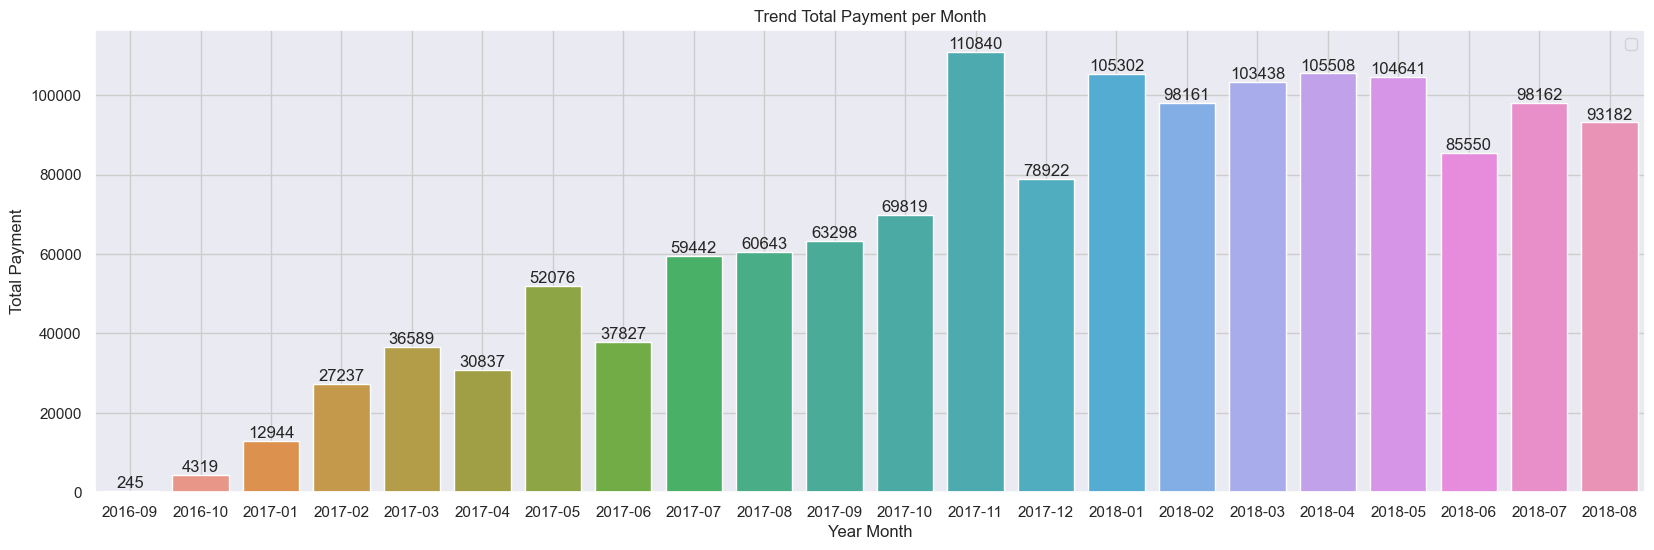

In [151]:
sns.set()
plt.figure(figsize=(20, 6))

ax = sns.barplot(x='purchase_per_month', y='total_payment', data=payment_month)
for i in ax.containers:
    ax.bar_label(i, )

ax.set_title('Trend Total Payment per Month')
ax.grid(color='#cccccc')
ax.set_xlabel('Year Month')
ax.set_ylabel('Total Payment')
ax.set_xticklabels(payment_month['purchase_per_month'].unique().astype(str), rotation='horizontal')
ax.legend(loc=1)

plt.show()

4. Total Revenue per category product

In [156]:
revenue_category = pd.read_sql_query("""
                                    WITH revenue_category AS (
                                        SELECT
                                            ROUND(SUM(o.payment_value)) AS total_payment,
                                            ROUND(SUM(o.price)) AS total_price,
                                            p.category
                                        FROM table_orders o
                                        INNER JOIN table_customers c
                                        ON c.customer_id = o.customer_id
                                        INNER JOIN table_products p
                                        ON p.product_id = o.product_id
                                        INNER JOIN table_sellers s
                                        ON s.seller_id = o.seller_id 
                                        GROUP BY 3                                                                           
                                    )
                                        SELECT
                                            category,
                                            total_payment,
                                            total_price,
                                            (total_payment - total_price) AS revenue                                     
                                        FROM revenue_category
                                        ORDER BY revenue DESC                                         
                                    """, conn)
revenue_category

,category,total_payment,total_price,revenue
0,Furniture,398304.0,252340.0,145964.0
1,Electronics,354781.0,255141.0,99640.0
2,Home & Garden,148361.0,99882.0,48479.0
3,Entertaiment,172741.0,124908.0,47833.0
4,Health & Beauty,164229.0,118985.0,45244.0
5,Fashion,125431.0,95775.0,29656.0
6,Books & Stationery,37305.0,27103.0,10202.0
7,Industry & Construction,28262.0,18538.0,9724.0
8,Food & Drinks,9567.0,5467.0,4100.0


5. Average Price per Category Product based on Installment selection

In [161]:
avg_price = pd.read_sql_query("""
                                    WITH avg_price AS (
                                        SELECT
                                            ROUND(AVG(o.price), 1) AS avg_price,
                                            o.payment_installments,
                                            p.category
                                        FROM table_orders o
                                        INNER JOIN table_customers c
                                        ON c.customer_id = o.customer_id
                                        INNER JOIN table_products p
                                        ON p.product_id = o.product_id
                                        INNER JOIN table_sellers s
                                        ON s.seller_id = o.seller_id 
                                        GROUP BY 2, 3
                                        ORDER BY avg_price DESC                                       
                                    )
                                        SELECT *                                
                                        FROM avg_price
                                    """, conn)
avg_price

,avg_price,payment_installments,category
0,229.0,15.0,Electronics
1,229.0,20.0,Electronics
2,229.0,24.0,Entertaiment
3,212.0,9.0,Industry & Construction
4,185.0,12.0,Home & Garden
...,...,...,...
101,52.4,6.0,Books & Stationery
102,51.2,6.0,Food & Drinks
103,48.7,1.0,Food & Drinks
104,47.0,3.0,Food & Drinks


6. Average Range Delivery per Category Product

In [167]:
avg_range = pd.read_sql_query ("""
                                    WITH avg_range AS (
                                        SELECT
                                            JULIANDAY(STRFTIME('%Y-%m-%d', o.estimated_delivery)) - JULIANDAY(STRFTIME('%Y-%m-%d', o.approved)) AS range_delivery,
                                            p.category
                                        FROM table_orders o
                                        INNER JOIN table_customers c
                                        ON c.customer_id = o.customer_id
                                        INNER JOIN table_products p
                                        ON p.product_id = o.product_id
                                        INNER JOIN table_sellers s
                                        ON s.seller_id = o.seller_id
                                    )
                                        SELECT
                                            category,
                                            ROUND(AVG(range_delivery), 2) AS avg_delivery
                                        FROM avg_range
                                        GROUP BY 1
                                        ORDER BY avg_delivery DESC
                                    """, conn)
avg_range

,category,avg_delivery
0,Furniture,24.44
1,Electronics,24.23
2,Books & Stationery,23.86
3,Fashion,23.83
4,Entertaiment,23.50
5,Health & Beauty,23.41
6,Home & Garden,22.95
7,Industry & Construction,21.06
8,Food & Drinks,19.81


7. Order Status per Category Product

In [169]:
order_category = pd.read_sql_query ("""
                                    WITH order_category AS (
                                        SELECT
                                            COUNT(o.order_id) AS total_order,
                                            o.order_status,
                                            p.category
                                        FROM table_orders o
                                        INNER JOIN table_customers c
                                        ON c.customer_id = o.customer_id
                                        INNER JOIN table_products p
                                        ON p.product_id = o.product_id
                                        INNER JOIN table_sellers s
                                        ON s.seller_id = o.seller_id
                                        GROUP BY 2, 3
                                        ORDER BY total_order DESC
                                    )
                                        SELECT *
                                        FROM order_category
                                    """, conn)
order_category

,total_order,order_status,category
0,2612,delivered,Electronics
1,2586,delivered,Furniture
2,1237,delivered,Entertaiment
3,1214,delivered,Health & Beauty
4,1084,delivered,Home & Garden
5,892,delivered,Fashion
6,321,delivered,Books & Stationery
7,151,delivered,Industry & Construction
8,102,delivered,Food & Drinks
9,61,unavailable,Furniture


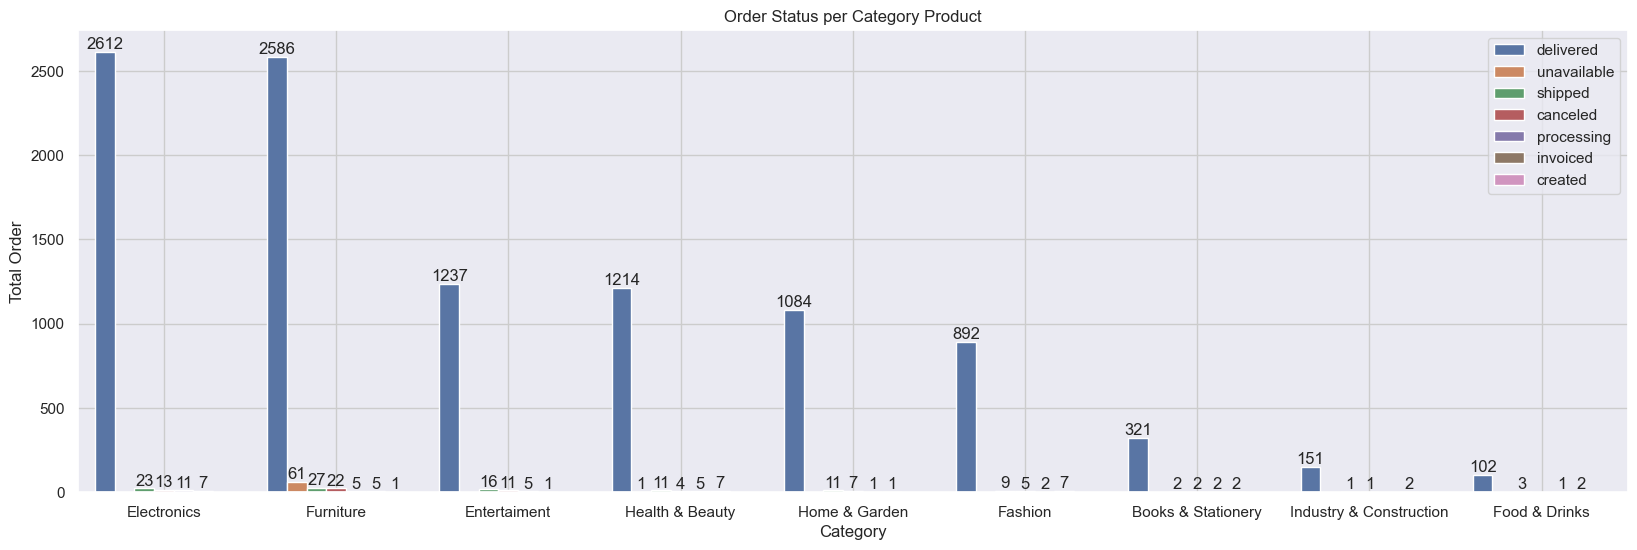

In [170]:
sns.set()
plt.figure(figsize=(20, 6))

ax = sns.barplot(x='category', y='total_order', hue='order_status', data=order_category)
for i in ax.containers:
    ax.bar_label(i, )

ax.set_title('Order Status per Category Product')
ax.grid(color='#cccccc')
ax.set_xlabel('Category')
ax.set_ylabel('Total Order')
ax.set_xticklabels(order_category['category'].unique().astype(str), rotation='horizontal')
ax.legend(loc=1)

plt.show()

8. Payment type per Category Product

In [171]:
payment_category = pd.read_sql_query ("""
                                    WITH payment_category AS (
                                        SELECT
                                            COUNT(o.order_id) AS total_order,
                                            o.payment_type,
                                            p.category
                                        FROM table_orders o
                                        INNER JOIN table_customers c
                                        ON c.customer_id = o.customer_id
                                        INNER JOIN table_products p
                                        ON p.product_id = o.product_id
                                        INNER JOIN table_sellers s
                                        ON s.seller_id = o.seller_id
                                        GROUP BY 2, 3
                                        ORDER BY total_order DESC
                                    )
                                        SELECT *
                                        FROM payment_category
                                    """, conn)
payment_category

,total_order,payment_type,category
0,1979,credit_card,Furniture
1,1947,credit_card,Electronics
2,976,credit_card,Entertaiment
3,927,credit_card,Health & Beauty
4,838,credit_card,Home & Garden
5,686,credit_card,Fashion
6,567,boleto,Electronics
7,528,boleto,Furniture
8,236,boleto,Health & Beauty
9,234,credit_card,Books & Stationery


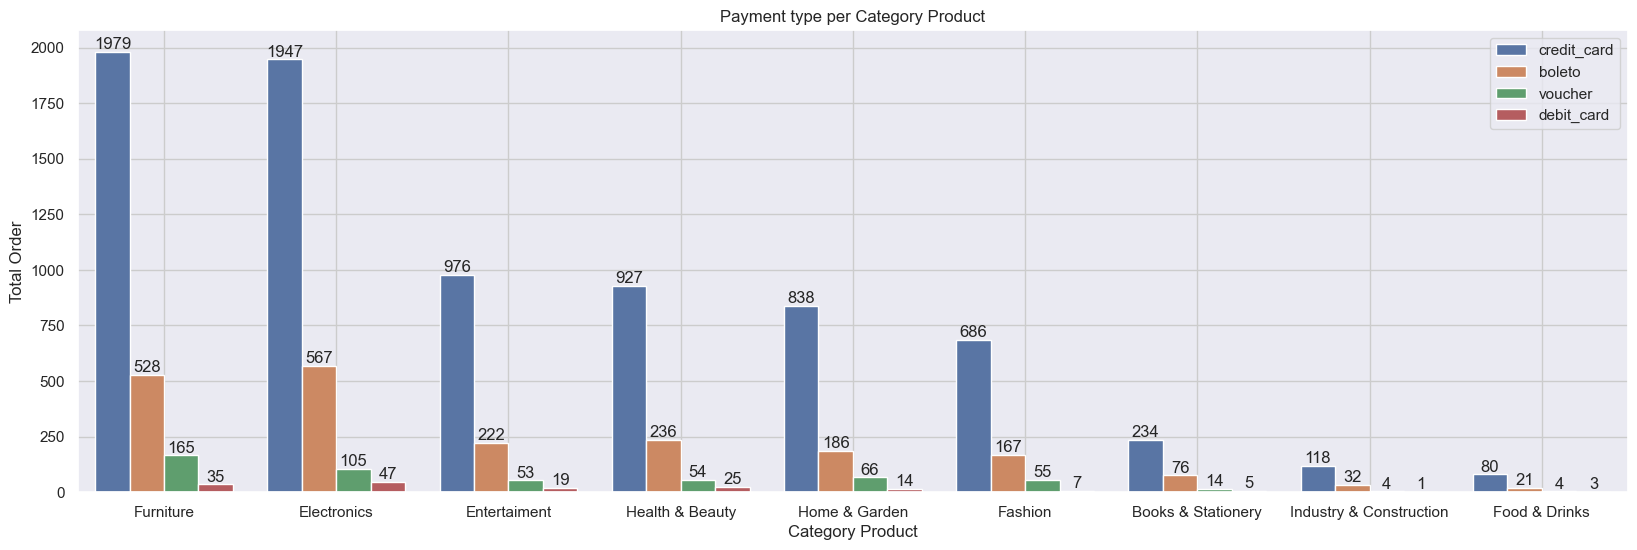

In [173]:
sns.set()
plt.figure(figsize=(20, 6))

ax = sns.barplot(x='category', y='total_order', hue='payment_type', data=payment_category)
for i in ax.containers:
    ax.bar_label(i, )

ax.set_title('Payment type per Category Product')
ax.grid(color='#cccccc')
ax.set_xlabel('Category Product')
ax.set_ylabel('Total Order')
ax.set_xticklabels(payment_category['category'].unique().astype(str), rotation='horizontal')
ax.legend(loc=1)

plt.show()

9. Review Score per Category Product

In [174]:
score_category = pd.read_sql_query ("""
                                    WITH score_category AS (
                                        SELECT
                                            COUNT(o.order_id) AS total_order,
                                            o.review_score,
                                            p.category
                                        FROM table_orders o
                                        INNER JOIN table_customers c
                                        ON c.customer_id = o.customer_id
                                        INNER JOIN table_products p
                                        ON p.product_id = o.product_id
                                        INNER JOIN table_sellers s
                                        ON s.seller_id = o.seller_id
                                        GROUP BY 2, 3
                                        ORDER BY total_order DESC
                                    )
                                        SELECT *
                                        FROM score_category
                                    """, conn)
score_category

,total_order,review_score,category
0,1477,5.0,Electronics
1,1387,5.0,Furniture
2,755,5.0,Entertaiment
3,743,5.0,Health & Beauty
4,674,5.0,Home & Garden
5,536,4.0,Electronics
6,517,5.0,Fashion
7,496,4.0,Furniture
8,429,1.0,Furniture
9,322,1.0,Electronics


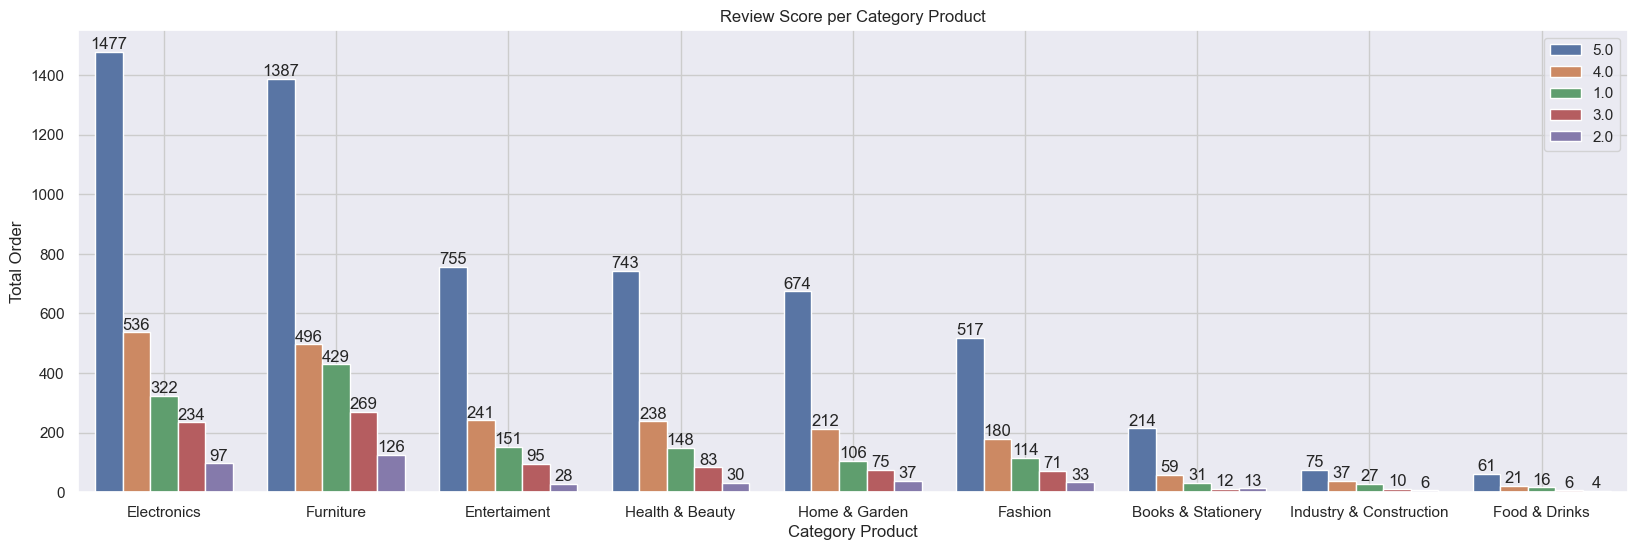

In [175]:
sns.set()
plt.figure(figsize=(20, 6))

ax = sns.barplot(x='category', y='total_order', hue='review_score', data=score_category)
for i in ax.containers:
    ax.bar_label(i, )

ax.set_title('Review Score per Category Product')
ax.grid(color='#cccccc')
ax.set_xlabel('Category Product')
ax.set_ylabel('Total Order')
ax.set_xticklabels(score_category['category'].unique().astype(str), rotation='horizontal')
ax.legend(loc=1)

plt.show()

## 8. Rekomendasi

1. Untuk dapat meningkatkan total sales, perusahaan dapat memberikan berbagai event seperti flash sale, discount, gratis ongkir, dan event-event lainnya di berbagai produk kategori, dan agar dapat mempertahankan tingkat revenue yang tinggi dari kategori produk furniture serta agar dapat meningkatkan revenue di produk kategori lain yang memiliki tingkat revenue yang rendah. 

2. Mengenai jarak pengiriman ketika customer mulai melakukan pembayaran dan ketika penjual mulai melakukan pengiriman, perusahaan dapat mengevaluasi seller agar dapat melakukan pengiriman dengan lebih cepat agar dapat meningkatkan tingkat kepuasan customer.

3. Mengenai status order, order dengan status delivery cukup mendominasi dan ini merupakan kabar yang baik, akan tetapi akan lebih baik lagi kedepannya, perusahaan dapat menghimbau seller agar dapat meningkat status delivery di berbagai category produk terutama category produk yang masih banyak mengalami masalah seperti shipped dan unavailable.

4. Tipe pembayaran credit card merupakan tipe payment yang paling banyak digunakan, dan perusahaan dapat memberikan berbagai befenit khusus untuk tipe credit card, dengan itu, customer akan lebih tertarik kembali untuk terus berbelanja.

## 9. Kesimpulan - Create the story

1. Dari semua state yang ada, SP (Sao Paolo) merupakan State yang paling banyak dalam melakukan order, dalam hal kategori produk pun SP (Sao Paolo) paling mendominasi dari segala jenis order di berbagai produk kategori dengan persentase 41,94%.

2. Total sales dari bulan September 2016 sampai dengan November 2017 terus mengalami peningkatan sebesar 99.78%, namun setelah itu total sales mulai mengalami penurunan sampai dengan Agustus 2018 sebesar 15,93%.

3. Berdasarkan dari harga suatu produk dan nilai transaksinya, kategori produk Furniture merupakan produk yang memiliki tingkat revenue tertinggi yaitu sebesar R$ 145.964.

4. Dari segi hal pemilihan tingkat angsuran, dimana ternyata harga dari suatu produk tidak terlalu berpengaruh terhadap keputusan pelanggan dalam memilih tingkat angsuran, apabila harga dari suatu produk itu tinggi, itu belum tentu customer akan memilih tingkat angsuran yang lebih lama, tapia da beberapa kategori produk yang dimana produk tersebut memiliki harga yang tinggi dan customer memilih tingkat angsuran yang lama juga.

5. Mengenai rata-rata jarak antara ketika customer mulai melakukan pembayaran dan ketika penjual mulai melakukan pengiriman produk, category produk Furniture merupakan produk yang memiliki jarak pengiriman yang lebih lama dari category lainnya yakni 24,44 hari.

6. Berdasarkan order status, status pengiriman masih terbilang cukup baik dikarenakan status delivery mendominasi dari segala jenis category dan tingkat persentase sebesar 97,17%.

7. Untuk tipe pembayaran yang digunakan, customer lebih banyak menggunakan tipe pembayaran menggunakan credit card dengan tingkat persentase 74,17%.

8. Berdasarkan hasil dari total review score secara keseluruhan, dari semua produk kategori, rating dengan bintang 5 paling banyak diberikan oleh customer di berbagai produk dengan tingkat persentase 56,24%.